# ¡Bienvenidos a la segunda sesión: Pandas!

### Objetivo de la sesión

* Conocer las ventajas de utilizar Pandas.
* Cargar un conjunto de datos utilizando Pandas.
* Conocer y utlilizar las operaciones básicas de Pandas.
* Localizar posibles aplicaciones 

### Antes de empezar, un repaso
En la última sesión vimos como usar arreglos de Numpy.

*   ¿Cómo creas una lista en Python?
*   ¿Cómo creas un diccionario en Python?
*   ¿Qué librería sirve para crear números aleatorios?
*   ¿De qué otra forma les llamamos a las listas?
*   ¿Cuáles son las ventajas de usar NumPy?
*   ¿Cómo importar la librería de NumPy?
*   ¿Cómo se creaba un arreglo de una dimensión en Numpy?
*   ¿Cómo se creaba un arreglo de dos dimensiones en Numpy?

# 1. Introducción


## 1.1 Numpy vs Pandas

*Pandas* es un librería de Python para el análisis de datos, la cual esta construida sobre múltiples librerías, entre ellas esta NumPy. Ofrece múltiples herramientas para la exploración, limpieza y trasformación de datos, las cuales son procesos críticos al trabajar con datos en Python. 



## 1.2 Recursos externos

Al ser una herramienta tan completa, es imposible cubrir todas sus operaciones en la sesión, por ello recomendamos las siguientes fuentes 

- Documentación oficial: http://pandas.pydata.org/pandas-docs/stable/
- *Python for Data Analysis* por *Wes McKinney*
- *Python Data Science Handbook* por Jake VanderPlas
- A Gentle Visual Intro to Data Analysis in Python Using Pandas [https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/]




## 1.3 Antes de empezar

### 1.3.1 ¿Cómo importar *pandas*? 

Podemos hacerlo de la manera tradicional y es comunmnete renombrada como *pd*

In [0]:
import pandas as pd

#Carguemos tambien Numpy para realizar ciertas operaciones
import numpy as np 

### 1.3.2 Estructuras: Series, Dataframe, Panel 

Aquí encontraremos las estructuras básicas que se útilizan en Pandas



#### Series

Es un arreglo unidimensional capaz que puede conter cualquier tipo de datos y poseen una etiqueta para identificación

In [0]:
# Creemos nuestra primera Serie desde un arreglo de Numpy
s = pd.Series(np.random.randn(5))
s

0   -1.319935
1    0.551124
2   -0.884899
3    0.557154
4    1.261286
dtype: float64

In [0]:
# Podemos indicar la etiqueda(índice) de nuestros datos 
s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s

a   -0.376237
b   -0.341661
c   -1.244833
d    0.303086
e    1.238952
dtype: float64

In [0]:
pesos = []
for i in range(1,4):
  print("Dame el peso de la persona %s"% i)
  pesos.append(int(input()))
familia = pd.Series(np.array(pesos) ,index=['Adriana', "Gustavo", "Fabiola"])
familia

Dame el peso de la persona 1
30
Dame el peso de la persona 2
40
Dame el peso de la persona 3
0


Adriana    30
Gustavo    40
Fabiola     0
dtype: int64

In [0]:
 # Y tambien podemos crearla desde un diccionario 
  d = {'b': 1, 'a': 0, 'c': 2}
  s2=pd.Series(d)
  
  # ¡Toma las llaves como los índices!
  s2

b    1
a    0
c    2
dtype: int64

In [0]:
# Operan muy similiarmente a los arreglos de Numpy

#Funcionan como un arreglo 
print(s2[2]*10)
print()

# Pero tambien funcionan como diccionario
print(s2['c']*10)
print()

# En este caso nos devuelve también el índice
print(s2[:2]*10) 
print()

# Y podemos usarlas como vectores para operaciones 
print(np.exp(s2))

20

20

b    10
a     0
dtype: int64

b    2.718282
a    1.000000
c    7.389056
dtype: float64


In [0]:
s2

b    1
a    0
c    2
dtype: int64

#####Reto:  Crear una serie con pandas.

#### Dataframes 

Es un arreglo de columnas, puede ser visto como un conjunto series: ahora tenemos índices y columnas



In [0]:
# Creacion desde un diccionario de series 
d = {
    'Uno': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
    'Dos': pd.Series([1, 2, 3, 4.], index=['a', 'b', 'c', 'd'])
}

pd.DataFrame(d)

,Uno,Dos
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [0]:
# Creado entradas de indices y columnas, las cuales se llena como NaN (Not A Number)
pd.DataFrame(d,index=['a','b','f'], columns=['Uno','Dos','Tres'])

,Uno,Dos,Tres
a,1.0,1.0,NaN
b,2.0,2.0,NaN
f,NaN,NaN,NaN


# 2. Uso básico de Pandas

A continucación realizaremos algunas operaciones básicas y útiles para usar en nuestra siguiente sección

In [0]:
# Consideremos la creación de un dataframe desde un diccionario

D={
    'A':pd.Series([100,200,300,400], index=['a','b','c','d']),
    'B':pd.Series([111,222,444],index=['a','b','d'])
}

df=pd.DataFrame(D)
df

,A,B
a,100,111.0
b,200,222.0
c,300,NaN
d,400,444.0


In [0]:
# Obtengamos los índices del dataframe
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [0]:
# Obtengamos las columnas 
df.columns


Index(['A', 'B'], dtype='object')

In [0]:
# Seleccionemos una columna 
df['A']

a    100
b    200
c    300
d    400
Name: A, dtype: int64

In [0]:
df

,A,B,C,D,E
a,100,111.0,False,11100.0,0
b,200,222.0,True,44400.0,200
c,300,NaN,False,NaN,0
d,400,444.0,True,177600.0,400


In [0]:
# Creando columnas mediante la operación de columnas 
df['C'] = df['A'] % 200 == 0 
df['D']=df['A']*df['B']
df['E']=df['A']*df['C']
df

,A,B,C,D,E
a,100,111.0,False,11100.0,0
b,200,222.0,True,44400.0,200
c,300,NaN,False,NaN,0
d,400,444.0,True,177600.0,400


In [0]:
# Borrando columnas de manera rápida 
#del df['C']
#df

In [0]:
df = df.drop(['a','b'])
df

,A,B,D,E
c,300,NaN,NaN,0
d,400,444.0,177600.0,400


In [0]:
# Podemos traer la una fila mediante su posición 
pd.DataFrame(df.iloc[0])

,c
A,300.0
B,NaN
D,NaN
E,0.0


In [0]:
# O mediante su índice 
pd.DataFrame(df.loc['c'])

,c
A,300.0
B,NaN
D,NaN
E,0.0


# 3. Ejercicios 


**Ejercicio 1: ** Películas https://bit.ly/2L2AvyZ

Archivos: https://bit.ly/2ZyEI0h


## 3.1 Archivo *movies*

### 3.1.1. Crear el dataframe
- Si estás ejecutando tu notebook desde Google Colaboratory, comienza en el paso 3.1.1.1
- Si estás ejecutando tu notebook en forma local, comienza en el paso 3.1.1.2

#### 3.1-1.1 Descarga de archivos desde Google Colaboratory

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a zip file based on its file ID.
#
# A file ID looks like: 1tDF08XYh1HnRDcY2dJxvP5ab14Q8L_9i
# https://drive.google.com/open?id=1tDF08XYh1HnRDcY2dJxvP5ab14Q8L_9i
file_id = '1tDF08XYh1HnRDcY2dJxvP5ab14Q8L_9i' # Get sharable link from file in Google Drive
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])


#### 3.1.1.2 Carga de archivos

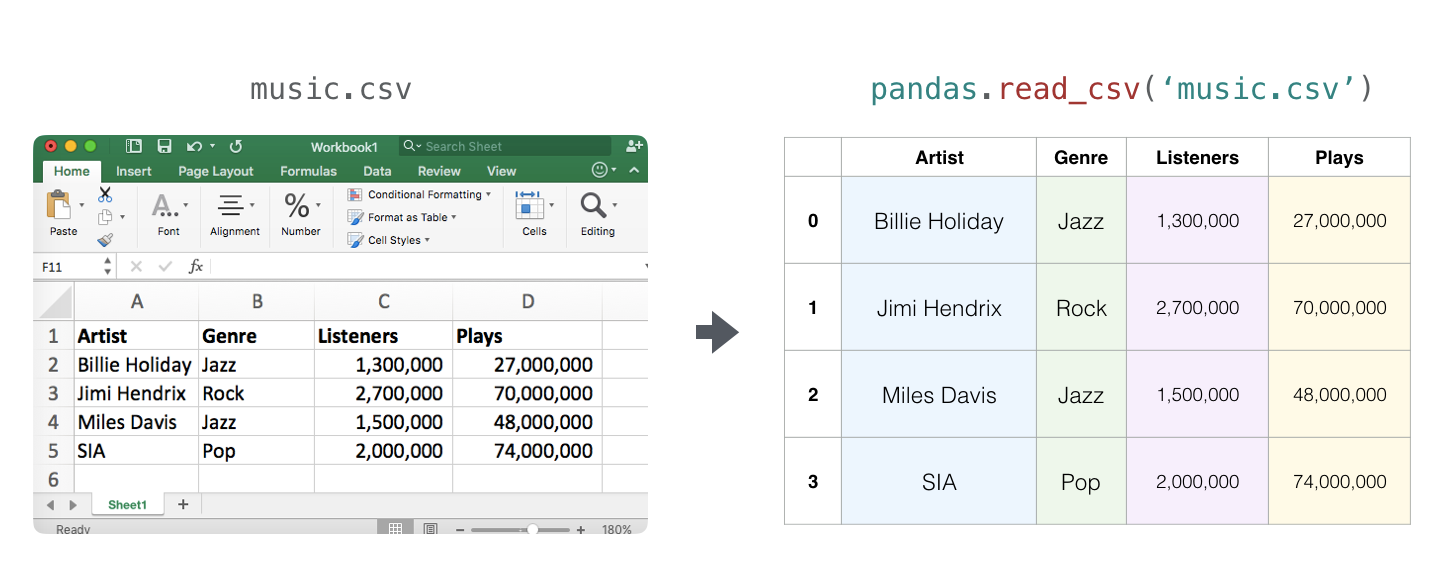
Créditos: Jay Alammar https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/

In [1]:
ls

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 5695-1FCD

 Directorio de C:\Users\Desarrollador\Documents\code\geggen\teaching\data-science\01DSOnline\4. Python Cientifico\Presentaci¢n

17/02/2020  04:09 p. m.    <DIR>          .
17/02/2020  04:09 p. m.    <DIR>          ..
17/02/2020  03:48 p. m.    <DIR>          .ipynb_checkpoints
16/02/2020  05:44 p. m.            22,254 Autodiagn¢stico.ipynb
17/02/2020  04:02 p. m.           130,261 NumPy - Creaci¢n y manipulaci¢n de datos num‚ricos.ipynb
17/02/2020  04:09 p. m.           310,624 Pandas - Panel Data.ipynb
16/02/2020  04:54 p. m.               176 ReadMe.md
               4 archivos        463,315 bytes
               3 dirs  715,661,611,008 bytes libres


In [0]:
movies = pd.read_csv('movies.csv')
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [0]:
!head movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [0]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###  2. ¿Conocemos los datos?

#### Columnas

Index(['movieId', 'title', 'genres'], dtype='object')

#### Tamaño

(9742, 3)

#### Tipos de datos

movieId     int64
title      object
genres     object
dtype: object

###  3. Renombrar las columnas ID, Titulo, Genero

###  4. ¿Hay Valores nulos (NaN) en las columnas?

###  5. ¿Hay valores repetidos? ¿Cuáles?

## 3.2. Archivo ratings

### 1. ¿Conocemos los datos? ¿Entendemos todos?

### 2. Obtengamos los estadísticos básicos de las calificaciones 

### 3. Cambiemos la escala de las calificaciones de un máximo de 5 a 100

### 4. ¿Cuántas calificaciones tiene cada película? ¿Cuál es la calificación media de cada uno?  Nota: agrupen las calificaciones y cuenten las clasificaciones 

### 5. ¿cuáles son las películas son las 20 mejores  y peores según las calificaciones? ¿Cuáles son las más calificadas? 

### 6. La columna de género en el DataFrame tiene divisiones, ¿podemos poner cada genero en una columna? 

### 7. Concatena las nuevas columnas y quita la columna vieja